<a href="https://colab.research.google.com/github/Raseeec/APD_24-0/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data = pd.read_csv('BancoDataset.csv')#Importamos data
df = pd.DataFrame(data)
#Ahora borramos las columnas que no se usarán y además sacamos la cantidad de datos que no conocemos
df = df.iloc[:, 1:-2]
df.replace('Unknown', pd.NA, inplace=True)#Reemplazamos los Unknown a null, para luego imputarlos mediante la media
central_values = df.median()
df = df.fillna(df.mode().iloc[0])
print(df.head())
df#Data imputada

In [ ]:
#asd = df2['Education_Level'].value_counts()
#print(asd)
df['Education_Level'] = pd.Categorical(df['Education_Level'], categories=["Uneducated", "High School", "College", "Graduate", "Post-Graduate", "Doctorate"], ordered=True)
df = df.sort_values(by='Education_Level')
df#Este será nuestro DataFrame

In [90]:
X = df.drop(columns=['Attrition_Flag'])  #Características
y = df['Attrition_Flag']  #Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
print(X_train.shape)#Para el training
print(X_test.shape)#Para el test

(7088, 19)
(3039, 19)


In [91]:
X_train_encoded = pd.get_dummies(X_train)#Convertimos las variables categóricas en variables dummy (one-hot encoded) antes de entrenar el modelo
X_test_encoded = pd.get_dummies(X_test)
modelo = DecisionTreeClassifier(random_state=100)
modelo = modelo.fit(X_train_encoded, y_train)

In [92]:
modelo.get_params()#Sacamos el parametro de complejidad

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 100,
 'splitter': 'best'}

In [93]:
predictions = modelo.predict(X_test_encoded)
predictions
accuracy_score(y_test, predictions)#El modelo predictivo sin podar

0.9361632115827575

In [94]:
modelo_pod = DecisionTreeClassifier(random_state=100, ccp_alpha=0.01)
modelo_pod = modelo_pod.fit(X_train_encoded, y_train)
predictions_pod = modelo_pod.predict(X_test_encoded)
predictions_pod
accuracy_score(y_test, predictions_pod)#El modelo predictivo podado

0.9137874300756827

In [95]:
print(classification_report(y_test, predictions, target_names=['Existing Customer', 'Attrited Customer']))

                   precision    recall  f1-score   support

Existing Customer       0.80      0.79      0.80       481
Attrited Customer       0.96      0.96      0.96      2558

         accuracy                           0.94      3039
        macro avg       0.88      0.88      0.88      3039
     weighted avg       0.94      0.94      0.94      3039



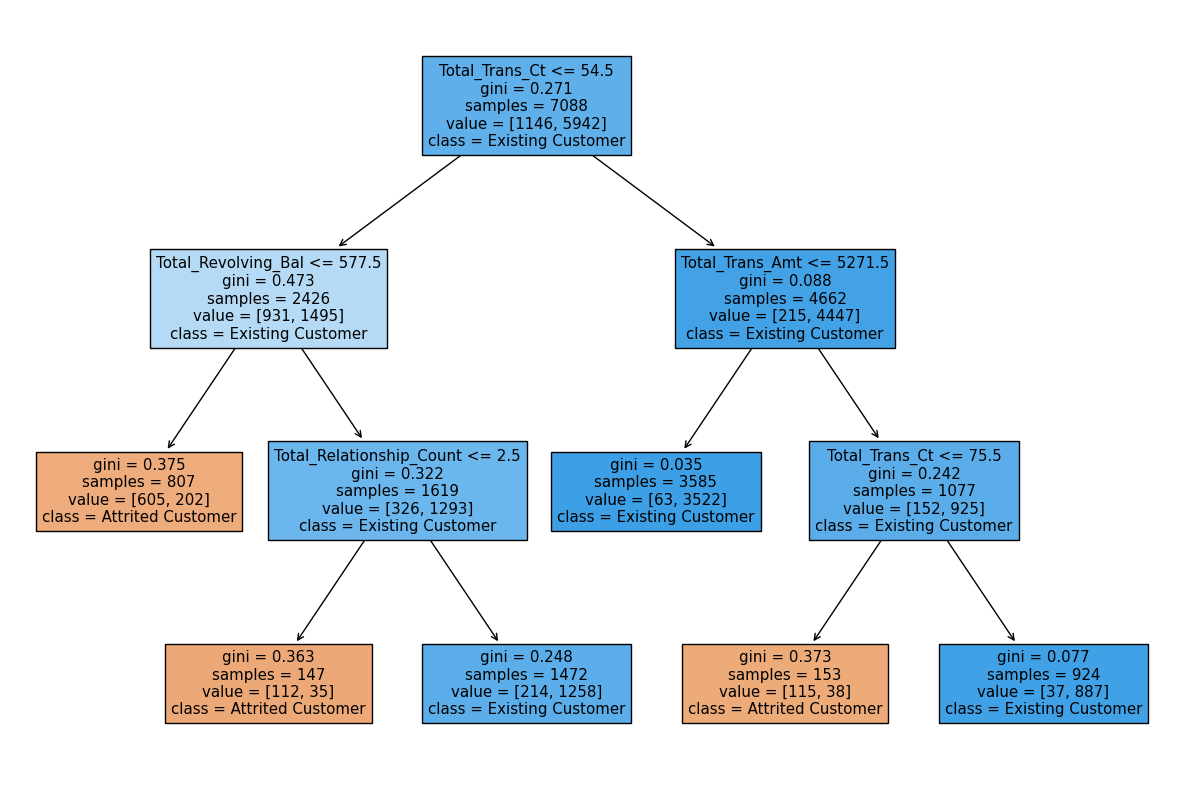

In [100]:
plt.figure(figsize=(15, 10))  # Ajustar el tamaño de la figura
plot_tree(modelo_pod, filled=True, feature_names=X_train_encoded.columns, class_names=modelo_pod.classes_)
plt.show()